# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
!pip install -q kaggle
import os

In [2]:
tf.__version__

'2.9.2'

Importing the dataset from kaggle

In [3]:

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emmillyimmaculate","key":"16e7dea75e82f70302fdd9675c67bf72"}'}

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
%cd /content/
! chmod 600 /content/kaggle.json
!kaggle datasets download -d emmillyimmaculate/poultry-faeces
! unzip poultry-faeces.zip

/content
100% 120M/120M [00:09<00:00, 16.0MB/s]
100% 120M/120M [00:09<00:00, 13.2MB/s]
Archive:  poultry-faeces.zip
  inflating: finalyearproject/.ipynb_checkpoints/final year project-checkpoint.ipynb  
  inflating: finalyearproject/Test/cocci/cocci.0.jpg  
  inflating: finalyearproject/Test/cocci/cocci.1.jpg  
  inflating: finalyearproject/Test/cocci/cocci.10.jpg  
  inflating: finalyearproject/Test/cocci/cocci.100.jpg  
  inflating: finalyearproject/Test/cocci/cocci.101.jpg  
  inflating: finalyearproject/Test/cocci/cocci.102.jpg  
  inflating: finalyearproject/Test/cocci/cocci.103.jpg  
  inflating: finalyearproject/Test/cocci/cocci.104.jpg  
  inflating: finalyearproject/Test/cocci/cocci.105.jpg  
  inflating: finalyearproject/Test/cocci/cocci.106.jpg  
  inflating: finalyearproject/Test/cocci/cocci.107.jpg  
  inflating: finalyearproject/Test/cocci/cocci.108.jpg  
  inflating: finalyearproject/Test/cocci/cocci.109.jpg  
  inflating: finalyearproject/Test/cocci/cocci.11.jpg  
  inf

[link text](https://)



```
# This is formatted as code
```



## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('finalyearproject/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 shuffle=True,
                                                 class_mode = 'binary')

Found 3737 images belonging to 2 classes.


### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('finalyearproject/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 409 images belonging to 2 classes.


In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_datagen.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

AttributeError: ignored

<Figure size 720x720 with 0 Axes>

## Part 2 - Building the CNN

In [9]:
# from keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization,GlobalAveragePooling2D, Input,Flatten
# from keras import regularizers
# from keras.models import Model
# from keras.applications.efficientnet import EfficientNetB6


# img_shape=(224, 224, 3)
# model_name='EfficientNetB6'
# base_model=tf.keras.applications.efficientnet.EfficientNetB6(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max')

#     # Freeze the pretrained weights
# base_model.trainable = False

#     # Rebuild top
# x = GlobalAveragePooling2D(name="avg_pool")(base_model.output)
# x = BatchNormalization()(x)

# top_dropout_rate = 0.2
# x = Dropout(top_dropout_rate, name="top_dropout")(x)
# outputs = Dense(2, activation="sigmoid", name="pred")(x)

#     # Compile
# model = tf.keras.Model(inputs, outputs, name="EfficientNet")
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
# model.compile(
#         optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"]) 


# # model.compile(optimizer = adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

### Initialising the CNN

In [10]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))

### Step 2 - Pooling

In [12]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [14]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [15]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [16]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [21]:
cnn.compile(optimizer = 'RMSProp', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [23]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
117/117 [==============================] - 56s 411ms/step - loss: 0.4156 - accuracy: 0.8777 - val_loss: 0.1748 - val_accuracy: 0.9438
Epoch 2/20
117/117 [==============================] - 46s 393ms/step - loss: 0.1326 - accuracy: 0.9580 - val_loss: 0.1687 - val_accuracy: 0.9633
Epoch 3/20
117/117 [==============================] - 46s 390ms/step - loss: 0.0934 - accuracy: 0.9655 - val_loss: 0.1352 - val_accuracy: 0.9756
Epoch 4/20
117/117 [==============================] - 46s 390ms/step - loss: 0.1080 - accuracy: 0.9714 - val_loss: 0.0851 - val_accuracy: 0.9707
Epoch 5/20
117/117 [==============================] - 47s 399ms/step - loss: 0.0759 - accuracy: 0.9719 - val_loss: 0.0902 - val_accuracy: 0.9780
Epoch 6/20
117/117 [==============================] - 46s 391ms/step - loss: 0.1292 - accuracy: 0.9775 - val_loss: 0.0604 - val_accuracy: 0.9780
Epoch 7/20
117/117 [==============================] - 46s 390ms/step - loss: 0.0776 - accuracy: 0.9797 - val_loss: 0.0953 - val_ac

Graphs of accuracy and loss

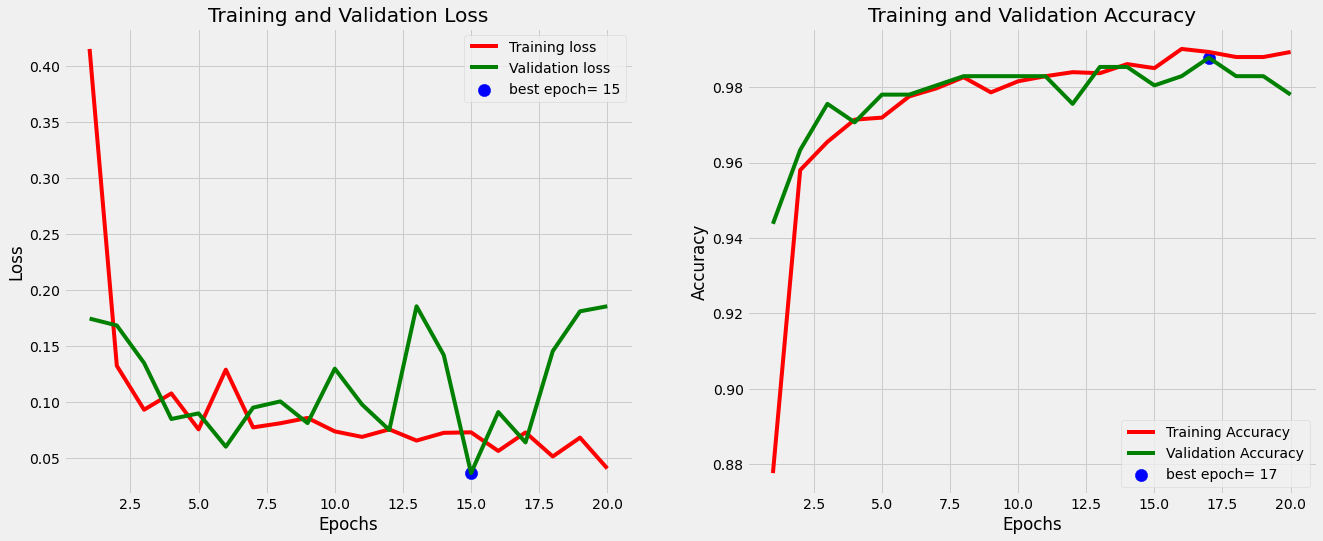

In [24]:
import numpy as np
import matplotlib.pyplot as plt
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    
tr_plot(history,0)

Confusion Matrix

In [25]:
test_model_path ="/finalyearproject/test_model"
test_model_label = []
for i in range(14):
  if(i < 7):
    test_model_label.append('cocci')
  else:
    test_model_label.append('healthy')

print(test_model_label)

['cocci', 'cocci', 'cocci', 'cocci', 'cocci', 'cocci', 'cocci', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy']


In [26]:
from matplotlib import image as img
import glob
test_gen = []
for entry in glob.glob('/content/finalyearproject/test_model/*.*.jpg'):
  img1 = np.array(img.imread(entry))
  img1 = np.expand_dims(img1, axis = 0)

  test_gen.append(img1)
print(test_gen)
print(len(test_gen))

[array([[[[ 36,  13,  19],
         [ 29,   8,   5],
         [ 39,  17,   3],
         ...,
         [106,  77,  45],
         [112,  82,  48],
         [124,  94,  58]],

        [[ 34,  12,  15],
         [ 33,  12,   7],
         [ 37,  15,   1],
         ...,
         [121,  91,  57],
         [133, 103,  65],
         [136, 107,  67]],

        [[ 35,  14,  11],
         [ 36,  16,   9],
         [ 40,  18,   4],
         ...,
         [118,  88,  50],
         [135, 106,  62],
         [128, 100,  52]],

        ...,

        [[ 45,  25,  16],
         [ 44,  24,  15],
         [ 45,  25,  16],
         ...,
         [112,  88,  86],
         [117,  93,  91],
         [111,  87,  83]],

        [[ 43,  26,  19],
         [ 40,  21,  15],
         [ 39,  20,  13],
         ...,
         [107,  88,  84],
         [105,  86,  82],
         [113,  94,  88]],

        [[ 38,  21,  14],
         [ 37,  20,  13],
         [ 39,  22,  15],
         ...,
         [110,  95,  90],
       

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred2= []

y_pred= []
y_true = test_model_label
errors=0

In [47]:
z_pred = []
for i in test_gen:
  count=0
  pred=cnn.predict(i)
  if(pred[0][0] == 0.0):
    z_pred.append('cocci')
  else:
    z_pred.append('healthy')

  print(z_pred[0][0])
  count = count + 1
   # predict on the test set
tests=len(y_pred)
print(tests)

1/1 [==============================] - 0s 20ms/step
c
1/1 [==============================] - 0s 18ms/step
c
1/1 [==============================] - 0s 19ms/step
c
1/1 [==============================] - 0s 18ms/step
c
1/1 [==============================] - 0s 20ms/step
c
1/1 [==============================] - 0s 18ms/step
c
1/1 [==============================] - 0s 19ms/step
c
1/1 [==============================] - 0s 20ms/step
c
1/1 [==============================] - 0s 33ms/step
c
1/1 [==============================] - 0s 19ms/step
c
1/1 [==============================] - 0s 18ms/step
c
1/1 [==============================] - 0s 17ms/step
c
1/1 [==============================] - 0s 19ms/step
c
1/1 [==============================] - 0s 17ms/step
c
85


In [45]:

# for i, p in enumerate(y_pred):
#         pred_index=np.argmax(p)         
#         true_index=test_model_label[i]  # labels are integer values
#         if pred_index != true_index: # a misclassification has occurred                                           
#             errors=errors + 1
#         y_pred2.append(pred_index)
# acc=( 1-errors/tests) * 100
# print(f'there were {errors} in {tests} tests for an accuracy of {acc:6.2f}')
# ypred=np.array(y_pred2)
# ytrue=np.array(y_true)
# print(ytrue)
# print(ypred)

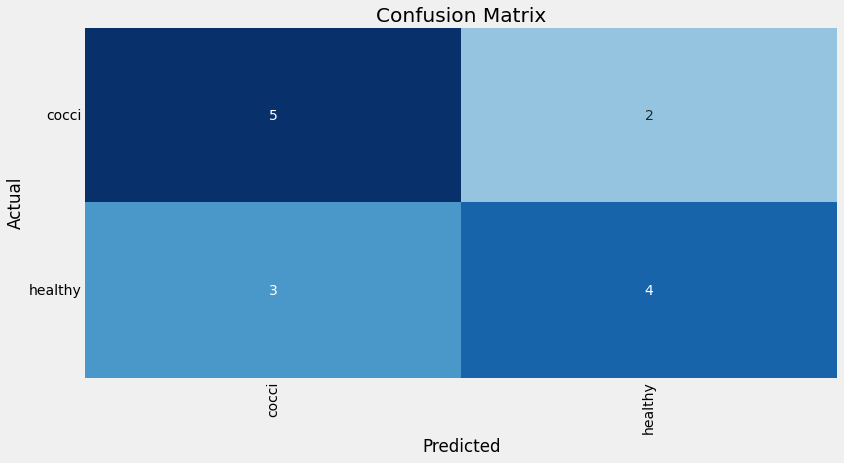

Classification Report:
----------------------
               precision    recall  f1-score   support

       cocci     0.6250    0.7143    0.6667         7
     healthy     0.6667    0.5714    0.6154         7

    accuracy                         0.6429        14
   macro avg     0.6458    0.6429    0.6410        14
weighted avg     0.6458    0.6429    0.6410        14



In [50]:
cm = confusion_matrix(y_true, z_pred )
# plot the confusion matrix
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(2)+.5, ["cocci","healthy"], rotation=90)
plt.yticks(np.arange(2)+.5, ["cocci","healthy"], rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
clr = classification_report(y_true, z_pred, target_names=["cocci","healthy"], digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

## Part 4 - Making a single prediction

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('finalyearproject/test_model/cocci.205.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'healthy'
else:
  prediction = 'cocci'

In [ ]:
training_set.class_indices

In [ ]:
print(prediction)

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('finalyearproject/test_model/healthy.204.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)

training_set.class_indices
if result[0][0] == 1:
  prediction = 'healthy'
else:
  prediction = 'cocci'

In [ ]:
print(prediction)